# 📘 Simple Stock Market Prediction using LSTM
This notebook demonstrates how to forecast stock prices using LSTM (Long Short-Term Memory) neural networks.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import datetime

In [3]:
# Define the stock symbol and date range
stock_symbol = 'AAPL'  # Change as needed
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.today()

# Download stock data
df = yf.download(stock_symbol, start=start, end=end)
df.head()

C:\Users\devar\AppData\Local\Temp\ipykernel_17852\2755282278.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.431895,6.446621,6.382907,6.414463,493729600
2010-01-05,6.443015,6.479380,6.409053,6.449627,601904800
2010-01-06,6.340532,6.468563,6.333920,6.443017,552160000
2010-01-07,6.328809,6.371487,6.282827,6.363973,477131200
2010-01-08,6.370886,6.371487,6.283128,6.320395,447610800


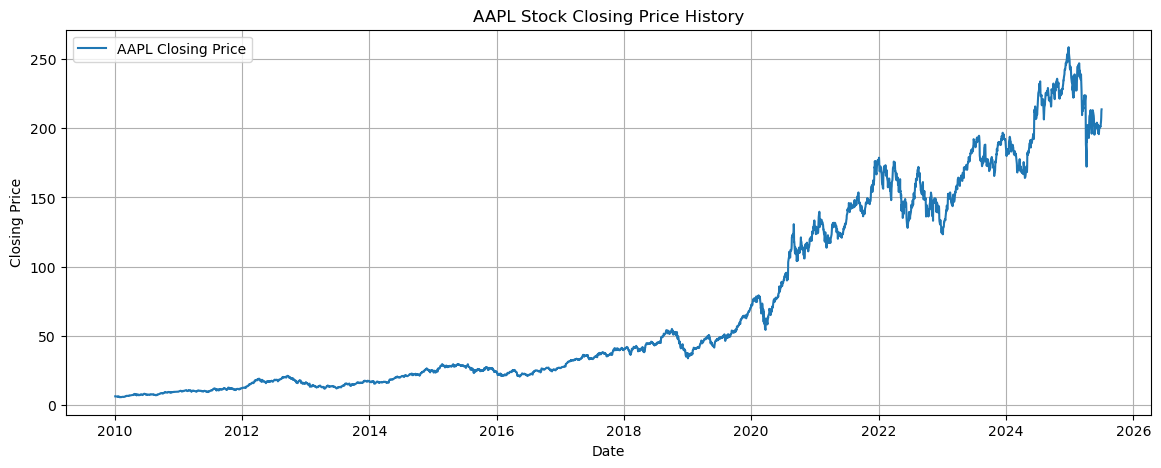

In [4]:
# Plot Closing Price
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label=f"{stock_symbol} Closing Price")
plt.title(f"{stock_symbol} Stock Closing Price History")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()

In [7]:
# Preprocess the data
data = df[['Close']].dropna()
dataset = data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [8]:
# Create training data
train_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_len]

X_train, y_train = [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile and train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)

c:\Users\devar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3059/3059 ━━━━━━━━━━━━━━━━━━━━ 86s 27ms/step - loss: 9.3621e-04


In [13]:
# Prepare test data
test_data = scaled_data[train_len - 60:]
X_test = []
y_test = dataset[train_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [11]:
# Predict and inverse transform
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


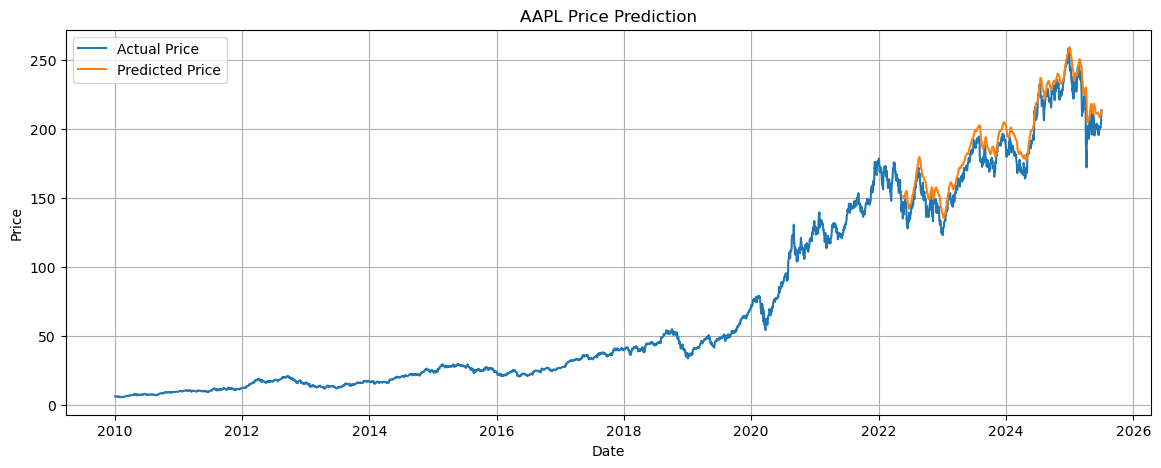

In [12]:
# Plot predictions vs actual
valid = data[train_len:].copy()
valid['Predictions'] = predictions

plt.figure(figsize=(14, 5))
plt.plot(data['Close'], label='Actual Price')
plt.plot(valid['Predictions'], label='Predicted Price')
plt.title(f"{stock_symbol} Price Prediction")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()